In [30]:
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times'],'size':16})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


In [11]:
def dotprod(a,b):
    '''
        Computes the inner or dot product of two lists without using numpy (and faster!) 
    '''
    return sum([x[0]*x[1] for x in zip(a, b)])

def ghk(Cin, Cout, P, T = 298):
    '''
        Takes a list of concentrations in/out of the cell and a list of permeabilities 
        and computes the Equilibrium Potential for that channel in Volts.
        Optionally pass in temperature as T.
        
        Assumes all ions are +1. If any ion is -1 then flip the Cin and Cout for that ion.
        e.g. 
        Nain = 10
        Naout = 100
        Clin = 20
        Clout = 80
        Cellin = [Nain, Clout]
        Cellout = [Naout, Clin]
        ghk(Cellin, Cellout, [1,1])
    '''
    R = 8.314 # J/K-mol, Gas Constant
    F = 9.65e4 # C/mol
    return R*T/F*math.log(dotprod(P,Cout) / dotprod(P,Cin))

In [25]:
CellIn = [14, 120] #Na+, K+
CellOut = [140, 3] #Na+, K+
P = [1, 15] #Na+, K+
Vm = ghk(CellIn, CellOut, P)
print('Resting Cell Membrane is around {:.02f} mV'.format(Vm*1000))


Resting Cell Membrane is around -58.61 mV


Let's see how the resting membrane potential changes as the scale the relative concentration of Na+ and K+.

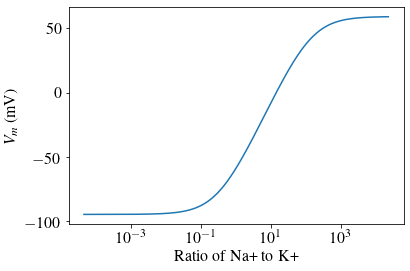

In [32]:
scale = np.exp(np.linspace(-10,10,1000))
Vm = [1000*ghk([14*x, 120], [140*x, 3], [1, 15]) for x in scale]
plt.plot(scale, Vm)
plt.xscale('log')
plt.xlabel('Ratio of Na+ to K+')
plt.ylabel('$V_m$ (mV)')
plt.show()

Cool! So we see that if we keep the in/out ratios of both Na+ and K+ the same, but change the overall ratio of K+ and Na+ we move the resting membrane potential from $E_k = -90mV$ to $E_{Na} = 60mV$.

We can do a similar exercise with the permeability to see what how that will influence $V_m$.
